## Import necessary libraries and the dataset

In [1]:
import numpy as np # linear alg.
import pandas as pd # for data processing. CSV file I/O
import matplotlib.pyplot as plt

house = pd.read_csv('./dataset/household_power_consumption/household_power_consumption.txt',
                    sep=';', parse_dates={'dt' : ['Date', 'Time']}, 
                    infer_datetime_format=True, low_memory=False, 
                    na_values=['nan','?'], index_col='dt')

house.shape

(2075259, 7)

(2075259, 7): This represents *rows-2075259* and *columns-7* that the dataset contains.

Null values:

In [2]:
house.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Fill the null values with mean values:

In [3]:
house = house.fillna(house.mean())

In [4]:
house.tail(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2010-11-26 20:53:00,0.944,0.0,238.72,4.0,0.0,0.0,0.0
2010-11-26 20:54:00,0.946,0.0,239.31,4.0,0.0,0.0,0.0
2010-11-26 20:55:00,0.946,0.0,239.74,4.0,0.0,0.0,0.0
2010-11-26 20:56:00,0.942,0.0,239.41,4.0,0.0,0.0,0.0
2010-11-26 20:57:00,0.946,0.0,240.33,4.0,0.0,0.0,0.0
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0


## Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


## Attribute Information:

1. date: Date in format dd/mm/yyyy (dt)
2. time: time in format hh:mm:ss    (dt)
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.



In [5]:
house.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

There are no null values left after filling with mean values.

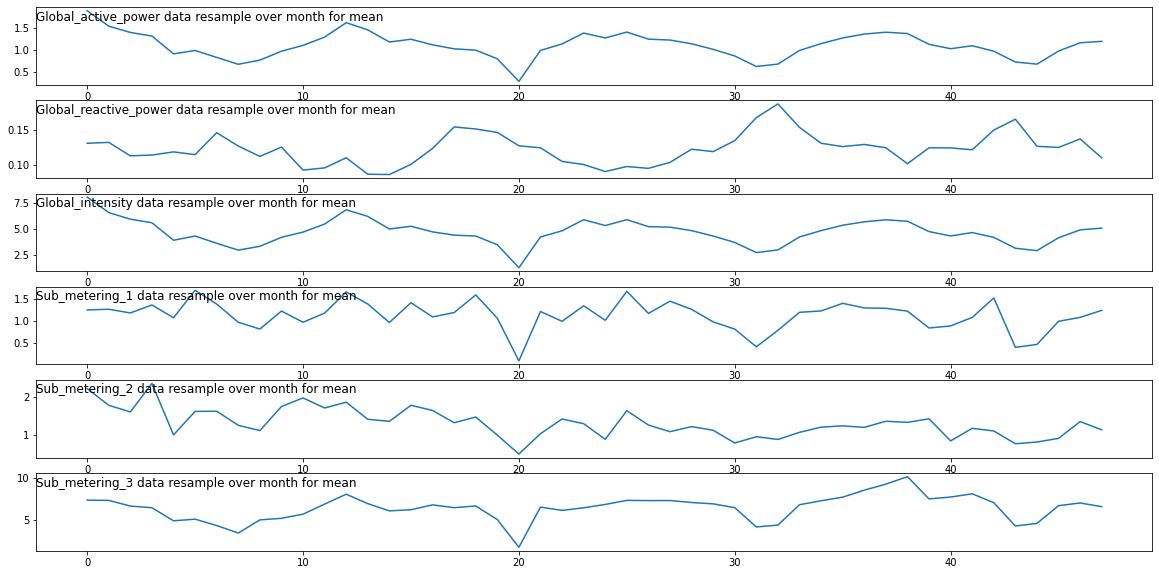

In [6]:
import matplotlib.pyplot as plt

i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(house.resample('M').mean().values[:, col])
    plt.title(house.columns[col] + ' data resample over month for mean', y=0.75, loc='left')
    i += 1
plt.show()

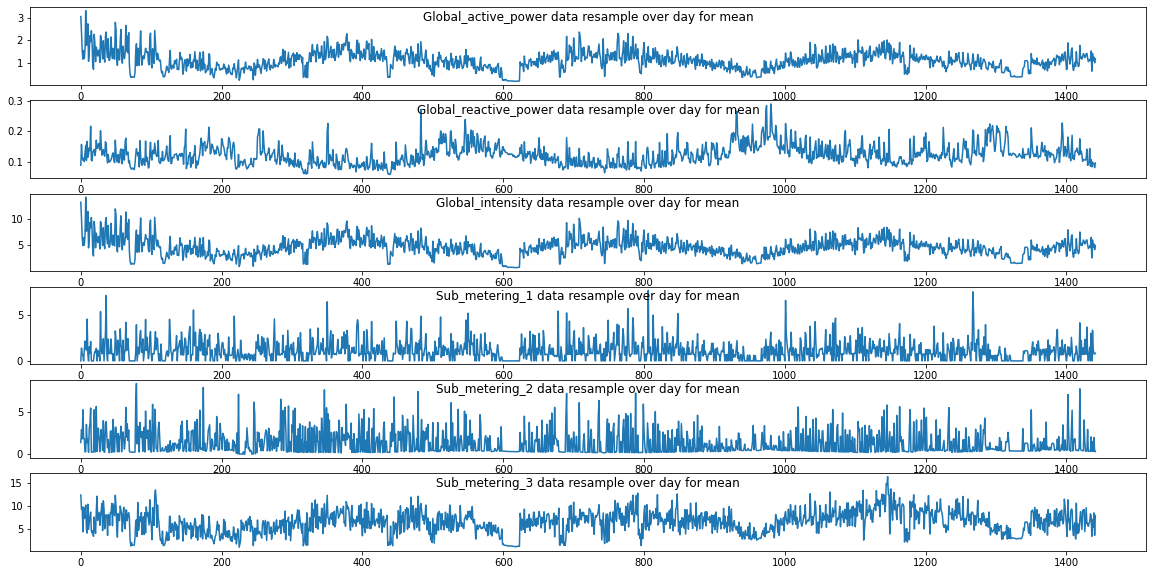

In [7]:

i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(house.resample('D').mean().values[:, col])
    plt.title(house.columns[col] + ' data resample over day for mean', y=0.75, loc='center')
    i += 1
plt.show()

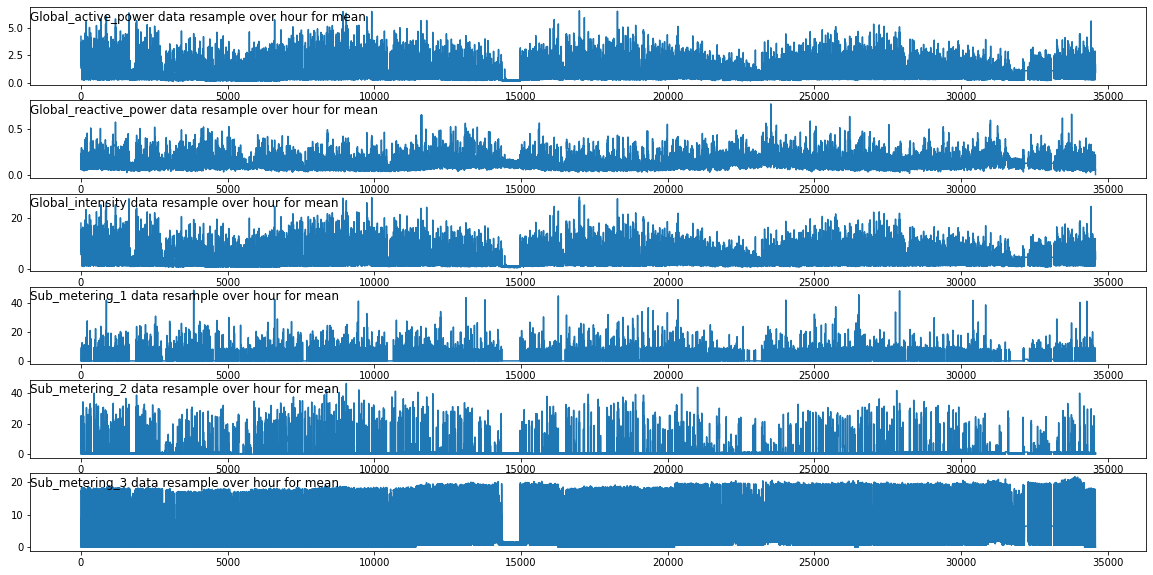

In [8]:
i = 1
cols=[0, 1, 3, 4, 5, 6]
plt.figure(figsize=(20, 10))
for col in cols:
    plt.subplot(len(cols), 1, i)
    plt.plot(house.resample('H').mean().values[:, col])
    plt.title(house.columns[col] + ' data resample over hour for mean', y=0.75, loc='left')
    i += 1
plt.show()

### From the visualisations above:

- Reorganising the samples by changing the time period to hour, day, month.. results in a great interaction
- When processed with large timescales, the model would be more predictable, whereas when we try to process the original data, it would be very expensive.

## LSTM Model: suited to large time-series data


helper func:

In [9]:
df = house[['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_2', 'Sub_metering_1','Sub_metering_3']]
       
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(-i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1)) for j in range(n_vars)]        
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        if dropnan:
            agg.dropna(inplace=True)
        return agg

In [10]:
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

preparing the data:

In [11]:
from sklearn.preprocessing import MinMaxScaler

values = df_resample.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
r = list(range(df_resample.shape[1]+1, 2*df_resample.shape[1]))
reframed.drop(reframed.columns[r], axis=1, inplace=True)
reframed.head()

# Data spliting into train and test data series. Only 4000 first data points are selected for traing purpose.
values = reframed.values
n_train_time = 4000
train = values[:n_train_time, :]
test = values[n_train_time:, :]
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

Epoch 1/50
58/58 - 4s - loss: 0.0292 - val_loss: 0.0110 - 4s/epoch - 74ms/step
Epoch 2/50
58/58 - 1s - loss: 0.0153 - val_loss: 0.0100 - 1s/epoch - 19ms/step
Epoch 3/50
58/58 - 1s - loss: 0.0141 - val_loss: 0.0099 - 1s/epoch - 18ms/step
Epoch 4/50
58/58 - 2s - loss: 0.0134 - val_loss: 0.0097 - 2s/epoch - 27ms/step
Epoch 5/50
58/58 - 1s - loss: 0.0129 - val_loss: 0.0096 - 1s/epoch - 19ms/step
Epoch 6/50
58/58 - 2s - loss: 0.0125 - val_loss: 0.0095 - 2s/epoch - 34ms/step
Epoch 7/50
58/58 - 1s - loss: 0.0123 - val_loss: 0.0094 - 1s/epoch - 21ms/step
Epoch 8/50
58/58 - 1s - loss: 0.0121 - val_loss: 0.0094 - 1s/epoch - 20ms/step
Epoch 9/50
58/58 - 2s - loss: 0.0120 - val_loss: 0.0093 - 2s/epoch - 31ms/step
Epoch 10/50
58/58 - 2s - loss: 0.0119 - val_loss: 0.0092 - 2s/epoch - 28ms/step
Epoch 11/50
58/58 - 1s - loss: 0.0119 - val_loss: 0.0092 - 1s/epoch - 23ms/step
Epoch 12/50
58/58 - 1s - loss: 0.0117 - val_loss: 0.0092 - 1s/epoch - 20ms/step
Epoch 13/50
58/58 - 1s - loss: 0.0118 - val_loss:

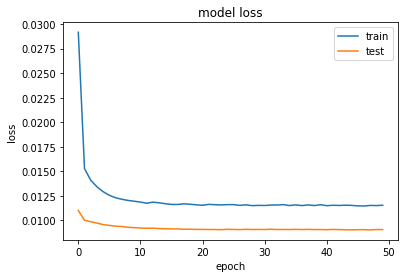

Test RMSE: 0.612


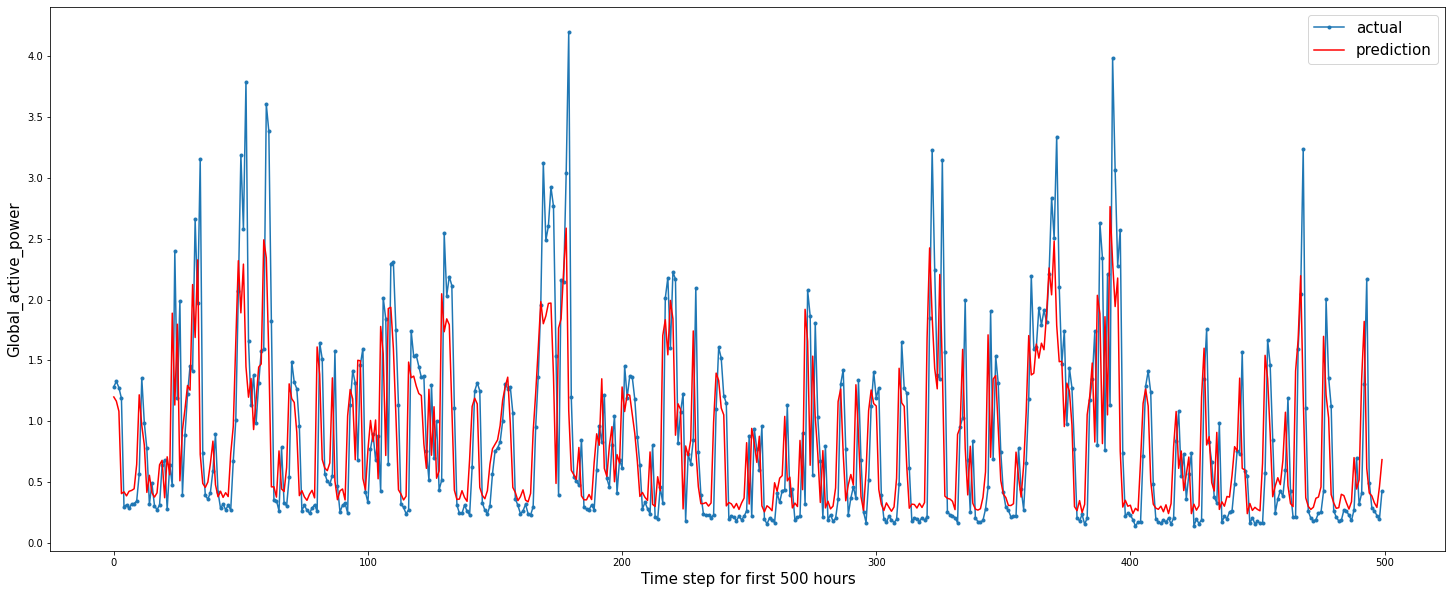

In [12]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import numpy as np

model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Network fitting
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False)

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df_resample.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# invert scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

aa=[x for x in range(500)]
plt.figure(figsize=(25,10)) 
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df.columns[0], size=15)
plt.xlabel('Time step for first 500 hours', size=15)
plt.legend(fontsize=15)
plt.show()